Imports and setup

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as se
import matplotlib.pyplot as plt
import math
from matplotlib.colors import ListedColormap



Create dataframe to correlate with

In [2]:


df = pd.DataFrame(pd.read_csv('cleaned_data_file copy 2.csv', sep=","))

cols = ['Case', 'Involved', 'Dead', 'Wounded', 'Vehicles', 'Address', 'Type',
       'Involved_lightmover', 'Involved_pedestrian', 'Involved_passenger',
       'Involved_offroad_vehicle', 'Involved_elderly', 'Involved_busdriver',
       'Involved_truckdriver', 'Involved_public_transport_driver',
       'Involved_car_driver', 'Involved_motorbike_driver',
       'Involved_moped_driver', 'Involved_biker', 'Involved_minor',
       'Involved_not_wore_seatbelt', 'Involved_learner_driver',
       'Involved_vehicle_driver', 'Road_type', 'Feature', 'Curvature',
       'Levelness', 'Road_condition', 'Surface_condition', 'Speed_limit',
       'Weather', 'Lighting', 'Latitude', 'Longitude', 'Date', 'Time']


for c in cols:
    print(df[c].value_counts(normalize=False, dropna=False))
    print()

df.dropna(inplace=True)

2.000140e+12    1
3.100211e+12    1
3.100211e+12    1
3.100211e+12    1
3.100211e+12    1
               ..
3.100180e+12    1
3.100180e+12    1
3.100180e+12    1
3.100180e+12    1
1.111180e+12    1
Name: Case, Length: 14028, dtype: int64

2.0     7531
1.0     4079
3.0     1484
4.0      454
5.0      180
0.0      163
6.0       65
7.0       34
8.0       13
10.0       7
9.0        6
11.0       3
13.0       3
24.0       2
15.0       1
19.0       1
14.0       1
22.0       1
Name: Involved, dtype: int64

0.0    13389
1.0      602
2.0       27
3.0        8
4.0        2
Name: Dead, dtype: int64

1.0     11320
2.0      1566
0.0       466
3.0       417
4.0       142
5.0        69
6.0        22
7.0         7
9.0         5
8.0         3
11.0        2
20.0        2
23.0        1
10.0        1
19.0        1
13.0        1
14.0        1
12.0        1
22.0        1
Name: Wounded, dtype: int64

1.0    7448
2.0    5025
3.0     891
0.0     431
4.0     169
5.0      45
6.0      15
7.0       3
9.0       1
Nam

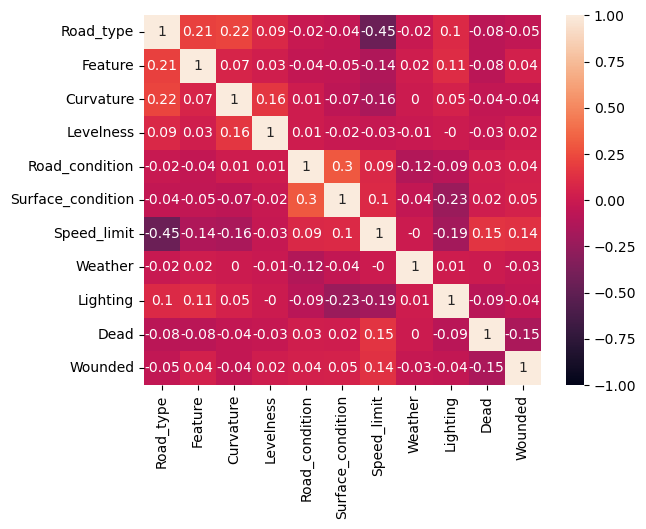

In [3]:
cols = ['Road_type', 'Feature', 'Curvature', 'Levelness', 'Road_condition', 'Surface_condition', 'Speed_limit','Weather', 'Lighting']
df_new = df[cols]

df_new = df_new.join(df[['Dead', 'Wounded']])

for c in df_new.columns:
    df_new[c] = df_new[c].astype('category').cat.codes


new_corrm = df_new.corr()

se.heatmap(new_corrm.round(2), annot = True, vmin = -1, vmax = 1)

plt.xlabel('')
plt.ylabel('')

plt.show()

All the usual, for example as the road condition worsens, the speed limit is reduced, or for example road condition is related to surface condition, so for example worse quality roads will be worse maintained.

Directly, there seems to not be any strong correlation between overall adverse weather/road conditions, and the lethality of an accident. Only slightly, the speed limit seems to have a correlation with the amount of fatalities, but the correlation remains too weak to be taken seriously.


What is interesting, is actually the lack of correlation in some cases. Here, the weather effects seem to not affect accident lethality at all.

In [4]:

def makeUnique(original_df, correlation_dataframe, column_name):
    # extract the unique values from the Surface_condition column
    unique_values = original_df[column_name].unique()

    # create a new dataframe with as many columns as there are unique values in the Surface_condition column
    # and the same number of rows as the original dataframe
    new_df = pd.DataFrame(columns=unique_values, index=original_df.index)

    # iterate over the rows of the original dataframe
    for i, row in original_df.iterrows():
        # set the corresponding cell in the new dataframe to 1 if the row has the value for that column,
        # and 0 otherwise
        for line in unique_values:
            new_df.loc[i, line] = 1 if row[column_name] == line else 0

    for c in new_df:
        new_df[c] = new_df[c].astype(int)


    # join the new dataframe with the original dataframe to create a single dataframe
    correlation_dataframe = correlation_dataframe.join(new_df)

    # return the resulting dataframe
    return correlation_dataframe


dead = df["Dead"].astype("category")
#corr_df = pd.get_dummies(corr_df['Dead'])
# Split the "Dead" column into four columns
corr_df = pd.get_dummies(dead, columns=["Dead"])
#corr_df = makeUnique(df, corr_df, 'Dead')


#'Road_type', 'Feature', 'Curvature', 'Levelness', 'Road_condition', 'Surface_condition', 'Speed_limit','Weather', 'Lighting',
#Select the features

#corr_df = makeUnique(df, corr_df, 'Road_type')

#corr_df = makeUnique(df, corr_df, 'Feature')

corr_df = makeUnique(df, corr_df, 'Curvature')

corr_df = makeUnique(df, corr_df, 'Levelness')


corr_df = makeUnique(df, corr_df, 'Road_condition')

corr_df = makeUnique(df, corr_df, 'Surface_condition')

#corr_df = makeUnique(df, corr_df, 'Weather')

#corr_df = makeUnique(df, corr_df, 'Lighting')

corr_df = makeUnique(df, corr_df, 'Speed_limit')

#corr_df = makeUnique(df, corr_df, 'Type')


corr_df.head()

,0.0,1.0,2.0,3.0,4.0,Sirge tee,Lauge kurv,Järsk kurv,Tasane tee,Kerge langus,...,40.0,110.0,10.0,100.0,15.0,45.0,25.0,80.0,5.0,120.0
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
corr_df = corr_df.drop(columns=['Kohev lahtine lumi', 'Töötlemata pinnaga jäätunud märg kate, jäide', 'Töödeldud pinnaga jäätunud kate', 'Lumelörts, soolalumine segu', 'Töötlemata pinnaga kinnisõidetud lumi', 'Pori, saaste', 'Töötlemata pinnaga jäätunud kuiv kate', 'Sõidujäljed puhtad, sõidujälgede vahe lumine', 'Töödeldud pinnaga kinnisõidetud lumi'], axis=1)
corr_df = corr_df.drop(columns=['Tõusu hari', 'Järsk tõus', 'Kerge tõus', 'Järsk langus'], axis=1)
corr_df = corr_df.drop(columns=['Sõidutee on ebatasane', 'Nähtavus on piiratud', 'Teekattemärgistus puudub', 'Puu (post) teepeenral (eraldusribal)', 'Sõidutee kitseneb', 'Sõiduteel on takistus', 'Teepeenar on halvas seisukorras', 'Ohtliku koha tähistus puudub', 'Liiklusmärk puudub, ei ole nähtav', 'Foor ei tööta, ei ole nähtav', 'Teeremondikoha tähistus on puudulik', 'Foor ei tööta, ei ole nähtav,Sõidutee on libe', 'Nähtavus on piiratud,Sõidutee on ebatasane,Sõidutee on libe,Teekattemärgistus puudub'], axis=1)
corr_df = corr_df.drop(columns=[20.0, 40.0, 110.0, 60.0, 10.0, 100.0, 80.0, 25.0, 45.0, 5.0, 120.0, 15.0], axis=1)

#
corr_df['Sirge tee'].rename('Straight road', inplace=True)


corrM = corr_df.corr()
corrM = corrM.drop(labels=['Sirge tee','Lauge kurv','Järsk kurv','Tasane tee','Kerge langus','Kuiv','Märg', 'Sõidutee on korras', 'Sõidutee on libe', 50.000000,	30.000000,	90.000000,70.000000], axis = 1)
corrM = corrM.drop(labels=[0, 1, 2, 3, 4], axis=0) 

Generate graph

<Figure size 640x480 with 0 Axes>

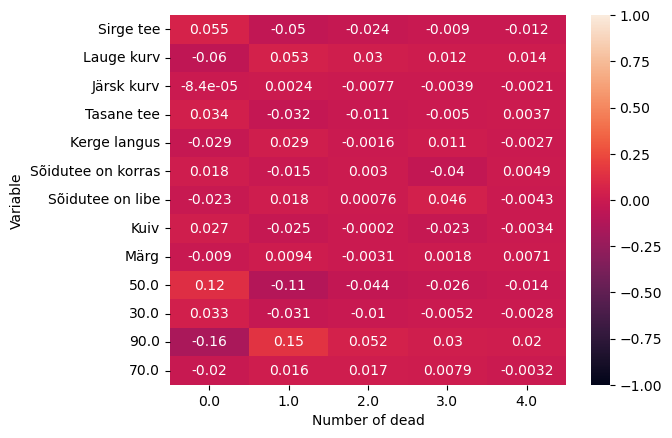

<Figure size 640x480 with 0 Axes>

In [6]:
from matplotlib.colors import ListedColormap

se.heatmap(corrM, annot = True, vmin = -1, vmax = 1)

plt.xlabel('Number of dead')
plt.ylabel('Variable')

plt.figure()

There does not seem to be any correlation at all between the amount of people who die in an accident and the driving conditions at the time of the accident. Only the speed limit seems to be correlated with the lethality, but due to such low correlation values, it can't be said for certain.

Instead lets look at the top roads, and by top roads we mean the roads people get hurt or die on the most

Prep road data:

In [7]:
data = pd.DataFrame(pd.read_csv('file.csv', sep=";"))

data.rename(columns={
    'Tee nr (PPA)' : 'Road_nr',
    'Tee km (PPA)' : 'Road_km_mark',
    'Hukkunuid' : 'Dead',
    'Vigastatuid' : 'Wounded',
    'Lubatud sõidukiirus (PPA)' : 'Speed_limit'
}, inplace=True)

keepers = ['Road_nr', 'Road_km_mark', 'Dead', 'Wounded', 'Speed_limit']

for c in data.columns:
    if c not in keepers:
        data.drop(columns=[c], inplace=True)

data['Speed_limit'][data['Speed_limit'] == 901] = 90

data.dropna(inplace=True)

data = data[data['Road_km_mark'].str.contains(',') == False]

data['Road_nr'] = data['Road_nr'].astype('int64')
data['Road_km_mark'] = data['Road_km_mark'].astype('int64')
data['Dead'] = data['Dead'].astype('int64')
data['Wounded'] = data['Wounded'].astype('int64')
data['Speed_limit'] = data['Speed_limit'].astype('int64')


#Take roads that have atleast 50 accidents
counts = data['Road_nr'].value_counts()
data = data[~data['Road_nr'].isin(counts[counts < 50].index)]

data.reset_index()


C:\Users\Robert\AppData\Local\Temp\ipykernel_12476\3881714302.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Speed_limit'][data['Speed_limit'] == 901] = 90


,index,Dead,Wounded,Speed_limit,Road_nr,Road_km_mark
0,6,0,4,90,11,35
1,18,0,1,90,11,4
2,26,0,1,70,8,14
3,29,1,3,90,1,19
4,32,0,1,90,8,13
...,...,...,...,...,...,...
1468,15677,0,2,90,4,85
1469,15679,0,1,90,9,57
1470,15680,0,3,70,15,51
1471,15688,0,1,90,10,42


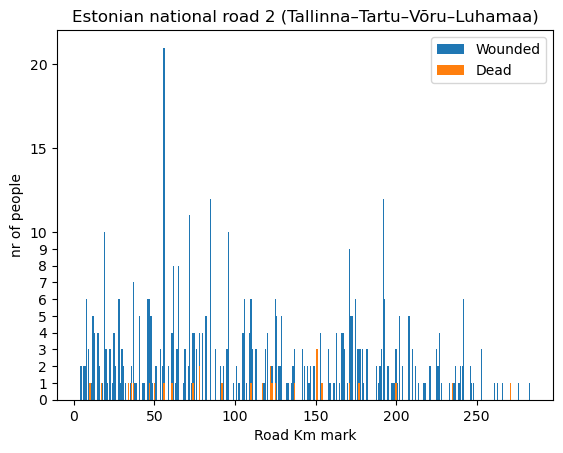

<Figure size 640x480 with 0 Axes>

In [8]:
#Road leaderboard
# 2        308
# 1        275
# 4        177
# 11       101
# 3         96
# 5         86
# 9         75
# 15        74
# 11390     66
# 8         63
# 10        52
# 39        50
# 92        50
# Name: Road_nr, dtype: int64

def m(nr):
    #data['Road_km_mark'] = data.apply(lambda row: (math.floor(row.Road_km_mark / 25)*25), axis=1)
    data_road_nr_2 = data[data.Road_nr == nr]
    data_road_nr_2 = data_road_nr_2.groupby(['Road_km_mark']).sum() #cum
    #data_road_nr_2 = data_road_nr_2.drop()
    ypoints = data_road_nr_2.Wounded
    xpoints = data_road_nr_2.index
    #data_road_nr_2
    return xpoints, ypoints


def n(nr):
    #data['Road_km_mark'] = data.apply(lambda row: (math.floor(row.Road_km_mark / 25)*25), axis=1)
    data_road_nr_2 = data[data.Road_nr == nr]
    data_road_nr_2 = data_road_nr_2.groupby(['Road_km_mark']).sum() #cum
    #data_road_nr_2 = data_road_nr_2.drop()
    ypoints = data_road_nr_2.Dead
    xpoints = data_road_nr_2.index
    #data_road_nr_2
    return xpoints, ypoints

a = m(2) #Tallinn Tartu
b = m(1) #Narva
c = m(4) #Tallinn pärnu

a2 = n(2)
b2 = n(1)




#Plotting

#Lets look at Tallinn-Tartu road
plt.bar(a[0], a[1])
plt.bar(a2[0], a2[1])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,15,20])
plt.xlabel(xlabel='Road Km mark')
plt.ylabel(ylabel='nr of people')
plt.legend(['Wounded', 'Dead'])
plt.title('Estonian national road 2 (Tallinna–Tartu–Võru–Luhamaa)')
plt.show()
plt.savefig('bigman.svg')

Directly, there seems to not be any strong correlation between overall adverse weather/road conditions, and the lethality of an accident. Only slightly, the speed limit seems to have a correlation with the amount of fatalities, but the correlation remains too weak to be taken seriously. What is interesting, is actually the lack of correlation in some cases. Here, the weather effects seem to not affect accident lethality at all.

We also looked at individual roads and assessed their lethality. Here, the Estonian national road 2 is shown with it's accidents as it had the highest accident count. Non-lethal accidents are more prone to happen around cities, whereas lethal accidents seem to happen between towns.

In [9]:
#se.lineplot(b[0], b[1])